In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
merged_df = pd.read_csv('../data/processed/merged.csv', index_col=0)
print(merged_df.shape)
merged_df.head()

(53046, 80)


,TEAM_ID,GAME_DATE_EST,SEASON,TEAM_WINS,PTS_for,PTS_against,FG_PCT_for,FG_PCT_against,FG3_PCT_for,FG3_PCT_against,...,PTS_for_prev_20,PTS_against_prev_20,FG_PCT_for_prev_20,FG_PCT_against_prev_20,FG3_PCT_for_prev_20,FG3_PCT_against_prev_20,AST_for_prev_20,AST_against_prev_20,REB_for_prev_20,REB_against_prev_20
GAME_ID,,,,,,,,,,,,,,,,,,,,,
20600002,1610612762,2003-10-05,2003,1,90.0,85.0,0.457,0.447,0.143,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20600003,1610612742,2003-10-05,2003,0,85.0,90.0,0.447,0.457,0.250,0.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20600004,1610612763,2003-10-06,2003,1,105.0,94.0,0.494,0.427,0.267,0.154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20600005,1610612749,2003-10-06,2003,0,94.0,105.0,0.427,0.494,0.154,0.267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20600006,1610612765,2003-10-07,2003,0,96.0,100.0,0.391,0.494,0.444,0.667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drops the first games of the seasons, and na's from the dataframe
merged_df = merged_df.dropna()
print(merged_df.shape)
merged_df.dropna().head()

(52447, 80)


,TEAM_ID,GAME_DATE_EST,SEASON,TEAM_WINS,PTS_for,PTS_against,FG_PCT_for,FG_PCT_against,FG3_PCT_for,FG3_PCT_against,...,PTS_for_prev_20,PTS_against_prev_20,FG_PCT_for_prev_20,FG_PCT_against_prev_20,FG3_PCT_for_prev_20,FG3_PCT_against_prev_20,AST_for_prev_20,AST_against_prev_20,REB_for_prev_20,REB_against_prev_20
GAME_ID,,,,,,,,,,,,,,,,,,,,,
20600008,1610612742,2003-10-07,2003,1,99.0,89.0,0.488,0.408,0.167,0.350,...,85.0,90.0,0.447,0.457,0.250,0.143,20.0,23.0,38.0,41.0
20600023,1610612739,2003-10-08,2003,1,83.0,80.0,0.438,0.350,0.250,0.429,...,100.0,96.0,0.494,0.391,0.667,0.444,25.0,19.0,52.0,37.0
20600029,1610612765,2003-10-08,2003,1,104.0,89.0,0.493,0.462,0.286,0.214,...,96.0,100.0,0.391,0.494,0.444,0.667,19.0,25.0,37.0,52.0
20600033,1610612745,2003-10-08,2003,0,78.0,98.0,0.329,0.413,0.211,0.370,...,80.0,104.0,0.470,0.527,0.333,0.429,10.0,22.0,37.0,33.0
20600035,1610612753,2003-10-08,2003,0,98.0,105.0,0.500,0.527,0.000,0.700,...,89.0,99.0,0.408,0.488,0.350,0.167,15.0,20.0,34.0,52.0


Above, we can see that not many games are lost from dropping na values (about 1%), and this is an easy way to deal with them. 

Next, we want explore how streak data can be used to predict game outcomes. Remember, 'stat_for' and 'stat_ag' features pertain to the game in question, whereas 'stat_for_prev_x' and 'stat_ag_prev_x' pertain to the average of the stat in the previous 'x' games leading up to the game in question.

Our first step is to calculate the cross correlations. 

(NOTE: the only non-numeric feature is 'GAME_DATE_EST', which records the data of the game For the moment this feature is excluded from correlations.)

In [60]:
corrs = merged_df.drop('GAME_DATE_EST', axis=1).corr() 
corrs.shape

(79, 79)

Next, we get the cross correlations between features pertaining to streak data over the past season, and select the "TEAM_WINS" feature to display. 

Note that correlation is scale invariant; i.e., scaling the data does not affect how the correlations come out

In [61]:
cols_0 = [col for col in merged_df.columns if "_0" in col]
corrs.loc[cols_0, "TEAM_WINS"].sort_values(ascending=False)

TEAM_WINS_prev_0          0.193150
FG_PCT_for_prev_0         0.124132
FG3_PCT_for_prev_0        0.083821
AST_for_prev_0            0.082589
PTS_for_prev_0            0.073352
REB_for_prev_0            0.037386
FG3_PCT_against_prev_0   -0.043180
PTS_against_prev_0       -0.070461
REB_against_prev_0       -0.071443
AST_against_prev_0       -0.085477
FG_PCT_against_prev_0    -0.105991
Name: TEAM_WINS, dtype: float64

From the above data, we can make some initial observations:

* the correlations are an encouraging sign that streak data can be used to predict game outcome

* some stats are more predictive than others.

* for the stats explored, allowing more stats against is negatively correlated with game outcome, whereas accumulating more stats for is positively correlated (this is something one might expect)

* Perhaps more interestingly, for certain stats, there are slight discrepancies between the offensive and defensive mirrors in predicting game outcome. This is most notable in FG3_PCT; the absolute value of a team's 3 point shooting percentage is almost double that of a team's 3 point shooting percentage allowed 



Now that we have looked a bit into streak data concerning the entire previous season, let's compare to streak data over a previous 'k' games instead. Below we use k = 5

In [62]:
cols_5 = [col for col in merged_df.columns if "_5" in col]
corrs.loc[cols_5, "TEAM_WINS"].sort_values(ascending=False)

TEAM_WINS_prev_5          0.147422
FG_PCT_for_prev_5         0.094362
PTS_for_prev_5            0.069097
AST_for_prev_5            0.066811
FG3_PCT_for_prev_5        0.053943
REB_for_prev_5            0.032197
FG3_PCT_against_prev_5   -0.022137
REB_against_prev_5       -0.065646
PTS_against_prev_5       -0.072075
AST_against_prev_5       -0.079466
FG_PCT_against_prev_5    -0.079793
Name: TEAM_WINS, dtype: float64

Interestingly enough, the correlations between the team's statistical performance over the previous 5 games still bears a significant correlation to game outcome, but it is not as much as a team's statistical performance over the entirety of the season. 

But does this trend hold, where the larger a statistical runway, the greater the predictive power in game outcome? 

To answer this, let's plot statistical correlations against previous runway:

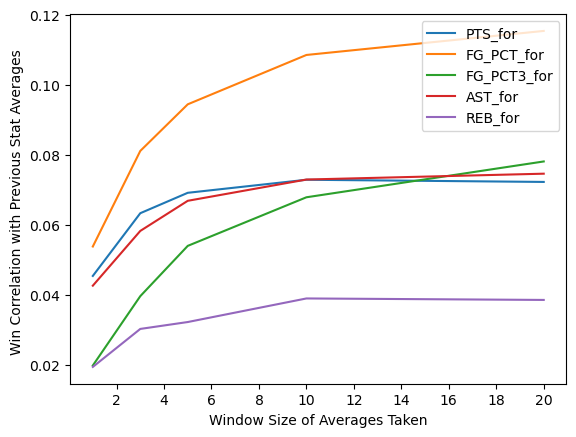

In [70]:
fig, ax = plt.subplots()
ax.set_ylabel("Win Correlation with Previous Stat Averages ")
ax.set_xlabel("Window Size of Averages Taken")
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])


# PTS_For
PTS_for_columns = [col for col in merged_df.columns if ("PTS_for_prev" in col) and ("_0" not in col)]
PTS_for_corrs = list(corrs.loc[PTS_for_columns, "TEAM_WINS"])
x_vals = [1, 3, 5, 10, 20]
ax.plot(x_vals, PTS_for_corrs, label="PTS_for")

# FG_PCT_for
FG_PCT_for_columns = [col for col in merged_df.columns if ("FG_PCT_for_prev" in col) and ("_0" not in col)]
FG_PCT_for_corrs = list(corrs.loc[FG_PCT_for_columns, "TEAM_WINS"])
x_vals = [1, 3, 5, 10, 20]
ax.plot(x_vals, FG_PCT_for_corrs, label="FG_PCT_for")


# FG3_PCT_for
FG3_PCT_for_columns = [col for col in merged_df.columns if ("FG3_PCT_for_prev" in col) and ("_0" not in col)]
FG3_PCT_for_corrs = list(corrs.loc[FG3_PCT_for_columns, "TEAM_WINS"])
x_vals = [1, 3, 5, 10, 20]
ax.plot(x_vals, FG3_PCT_for_corrs, label="FG_PCT3_for")

# AST_for
AST_for_columns = [col for col in merged_df.columns if ("AST_for_prev" in col) and ("_0" not in col)]
AST_for_corrs = list(corrs.loc[AST_for_columns, "TEAM_WINS"])
x_vals = [1, 3, 5, 10, 20]
ax.plot(x_vals, AST_for_corrs, label="AST_for")

# REB_for
REB_for_columns = [col for col in merged_df.columns if ("REB_for_prev" in col) and ("_0" not in col)]
REB_for_corrs = list(corrs.loc[REB_for_columns, "TEAM_WINS"])
x_vals = [1, 3, 5, 10, 20]
ax.plot(x_vals, REB_for_corrs, label="REB_for")

# Shows plot
ax.legend()
plt.show()

As can be seen above, the trend holds: the larger runway taken for streak data, the more indicative the data is of the game's outcome! 

Note that above, we are only looking at stats accumulated with respect to one team in the game, and not the other team. 'total.csv' was a dataset that puts together streak data from both teams involved in a game.

In [90]:
total_df = pd.read_csv('../data/processed/total.csv', index_col=0).dropna()
print(total_df.shape)
total_df.head()

(53046, 160)


,TEAM_ID_A,GAME_DATE_EST,SEASON,TEAM_WINS_A,PTS_for_A,PTS_against_A,FG_PCT_for_A,FG_PCT_against_A,FG3_PCT_for_A,FG3_PCT_against_A,...,PTS_against_prev_20_B,FG_PCT_for_prev_20_B,FG_PCT_against_prev_20_B,FG3_PCT_for_prev_20_B,FG3_PCT_against_prev_20_B,AST_for_prev_20_B,AST_against_prev_20_B,REB_for_prev_20_B,REB_against_prev_20_B,IS_HOME_B
GAME_ID,,,,,,,,,,,,,,,,,,,,,
20600002,1610612762,2003-10-05,2003,1,90.0,85.0,0.457,0.447,0.143,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
20600003,1610612742,2003-10-05,2003,0,85.0,90.0,0.447,0.457,0.250,0.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
20600004,1610612763,2003-10-06,2003,1,105.0,94.0,0.494,0.427,0.267,0.154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
20600005,1610612749,2003-10-06,2003,0,94.0,105.0,0.427,0.494,0.154,0.267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
20600006,1610612765,2003-10-07,2003,0,96.0,100.0,0.391,0.494,0.444,0.667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [72]:
corrs.loc['PTS_for_prev_20', 'PTS_against_prev_20']

0.7240880481076472

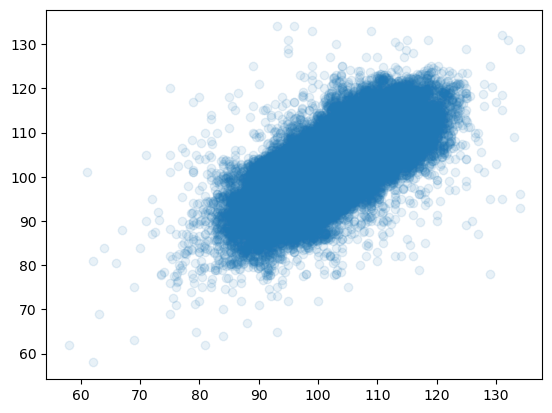

In [73]:
plt.plot(merged_df['PTS_for_prev_20'], merged_df['PTS_against_prev_20'], 'o', alpha=0.1)

In [75]:
import numpy as np

In [78]:
merged_df["TEAM_WINS"].values.mean()

0.4997425972886914

In [81]:
merged_df.sort_values("GAME_ID", ascending=False).head()

,TEAM_ID,GAME_DATE_EST,SEASON,TEAM_WINS,PTS_for,PTS_against,FG_PCT_for,FG_PCT_against,FG3_PCT_for,FG3_PCT_against,...,PTS_for_prev_20,PTS_against_prev_20,FG_PCT_for_prev_20,FG_PCT_against_prev_20,FG3_PCT_for_prev_20,FG3_PCT_against_prev_20,AST_for_prev_20,AST_against_prev_20,REB_for_prev_20,REB_against_prev_20
GAME_ID,,,,,,,,,,,,,,,,,,,,,
104200423,1610612740,2022-04-15,2021,1,105.0,101.0,0.489,0.412,0.273,0.250,...,115.60,115.05,0.47740,0.49905,0.34400,0.39175,25.35,28.70,44.90,39.85
104200422,1610612746,2022-04-15,2021,0,101.0,105.0,0.412,0.489,0.250,0.273,...,113.60,111.40,0.46625,0.46400,0.41105,0.37065,25.25,24.50,43.20,46.45
104200403,1610612737,2022-04-15,2021,1,107.0,101.0,0.488,0.457,0.290,0.361,...,119.25,113.95,0.47960,0.47520,0.37915,0.36290,26.40,23.95,44.40,45.00
104200402,1610612739,2022-04-15,2021,0,101.0,107.0,0.457,0.488,0.361,0.290,...,111.35,113.55,0.47470,0.47880,0.35780,0.37050,25.15,27.15,42.65,42.40
104200263,1610612759,2022-04-13,2021,0,103.0,113.0,0.407,0.543,0.382,0.400,...,114.60,113.85,0.46290,0.45905,0.34465,0.36470,26.90,23.85,45.35,46.85


In [83]:
print(10400423 // 2)
print(10400422 // 2)

5200211
5200211


In [86]:
print(merged_df[merged_df.index % 2 == 0].shape)
print(merged_df[merged_df.index % 2 == 1].shape)

(26221, 80)
(26226, 80)
